In [29]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import numpy as np

As we can see a single neighbor causes unsteady predictions while more neighbors cause a smoother fit but doesn't fit the training data as well.

###### Strengths, weaknesses, and parameters

_k_-NN, in principle, has two important parameters, the number of neighbors and how distance is measured.  Usually a small number of neighbors (3 to 5) is good in practice but the can and should be adjusted.  By default Euclidean distance is used  for how distance is measured which is good for most settings.

Strengths:
* easy to understand
* reasonable performace without much adjustment
* good baseline before more complicated models are used

Weaknesses:
* Slow to predict on very large datasets (by samples or features)
* Preprocessing data is important when using _k_-NN (more on this in chapter 3)
* Bad method when most features are zero (aka a __sparse dataset__)

w[0]: 0.393906  b: -0.031804


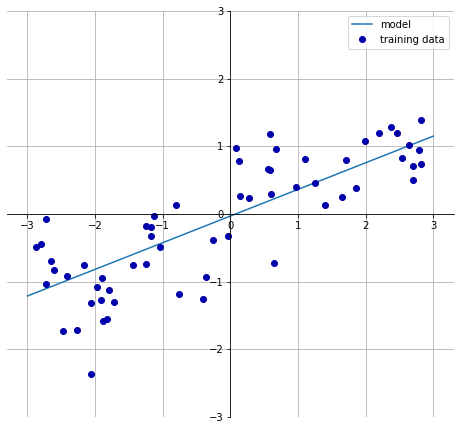

In [30]:
mglearn.plots.plot_linear_regression_wave()

A line vs the predictions of the `kNeighborsRegressor` seems very restrictive but a one-dimensional example is skewed.  If you have more features than training points any taget _y_ can be modelled exactly.  There are many different linear models for regression, the key difference between them being how the $w$'s and $b$ are chosen.

_**Linear regression (aka ordinary least squares)**_

Simplest and most classic linear model for regression. $w$ and $b$ are found so that the __mean square error__ is minimized between the predictions and the true regression targets of the training set.  Mean square error is the sum of the squared differences between prediction and true values divided by number of samples.  This model is nice because it has no parameters, however this gives users no control over complexity. The following code produces the fit in the plot above.

_NOTE:_  `scikit-learn` stores derived quantities from the training data with names that end in an underscore, hence the `coef_` and `intercept_` names.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print()
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746

Training set score: 0.67
Test set score: 0.66


`intercept_` is always a single float, `coef_` is a NumPy array with one entry per feature.  0.66 for $R^2$ is not great but since its close to the training set score we probably underfit the data.  It's hard to overfit on a simple example like this but once we get to higher dimensions linear models are more powerful and we must be careful not to overfit.

In [32]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Now with this real world data we see a case of overfitting since the training data score was very good but the tet data score sucks.  We instead should look for a model that lets us control complexity.

_**Ridge regression**_

In this model $w$s are chosen such that the training data is fit well but also to minimize the magnitudes of the coefficients as well (try to make as close to zero as possible).  This intuitively means that each feature has as little effect on the outcome as possible.  This constraining is an example of __regularization__ (explicitly restricting a model to avoid overfitting).  Ridge specifically uses an L2 regularization.

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As we can see ridge scores lower on the training data but higher on the test data.  The model is more restricted so we have alower likelyhood of overfitting.  Ridge makes trade-offs between simplicity (small coefficients) and performace on the training set.  This trade-off can be specified by the `alpha` parameter (defaults to 1.0).  Higher `alpha`s cause closer to zero coefficients at the cost of performance.  Lower `alpha`s cause less restriction on coefficients and benefits performance (results become closer to a standard linear regression).

In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64

Training set score: 0.93
Test set score: 0.77


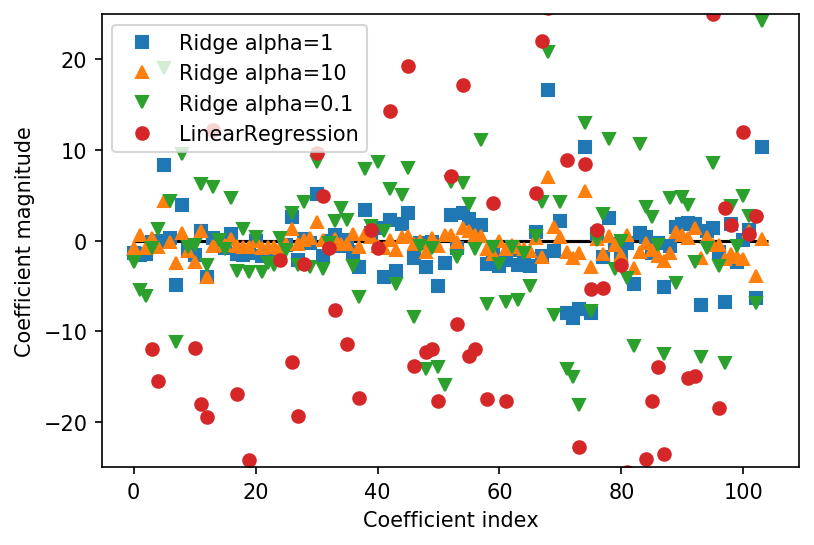

In [35]:
fig = plt.figure(dpi=150)
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The plot confirms higher alpha values correspond to lower magnitudes and vice versa. Another way to visualize how regularization effects is to fix `alpha` and vary the amount of training data. A plot that shows model performance as a function of dataset size is called a __learning curve__.

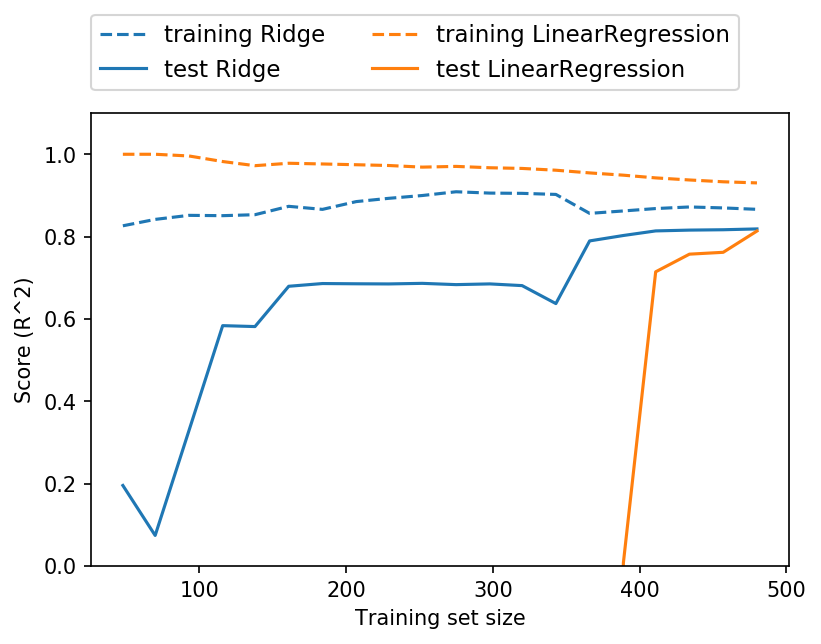

In [36]:
plt.figure(dpi=150)
mglearn.plots.plot_ridge_n_samples()

The plot shows the behavior we expect with the training set score better than the test set scores and the linear regression out performing on the training data because of its fewer constraints and ridge outperforming on the test data for the fact it has the constraints.  With more training data though, regularization becomes less important and the difference between ridge and lin reg becomes almost none.  Also note the decrease in performance in the training when more data is added. This is because with more data it become harder to overfit.

_**Lasso**_

An alternative to ridge is lasso.  The method is similar by restricting the coefficients, but lasso does it with an L1 regularization (causes some coefficients to be exactly 0 meaning they have no effect on the outcome). This is basically automatic feature selection and can help make the model easier to understand and reveal the most important features.

Training set score: 0.29
Test set score: 0.21
Number of features used: 4

Training set score: 0.90
Test set score: 0.77
Number of features used: 33
Training set score: 0.95
Test set score: 0.64
Number of features used: 96



Text(0, 0.5, 'Coefficient magnitude')

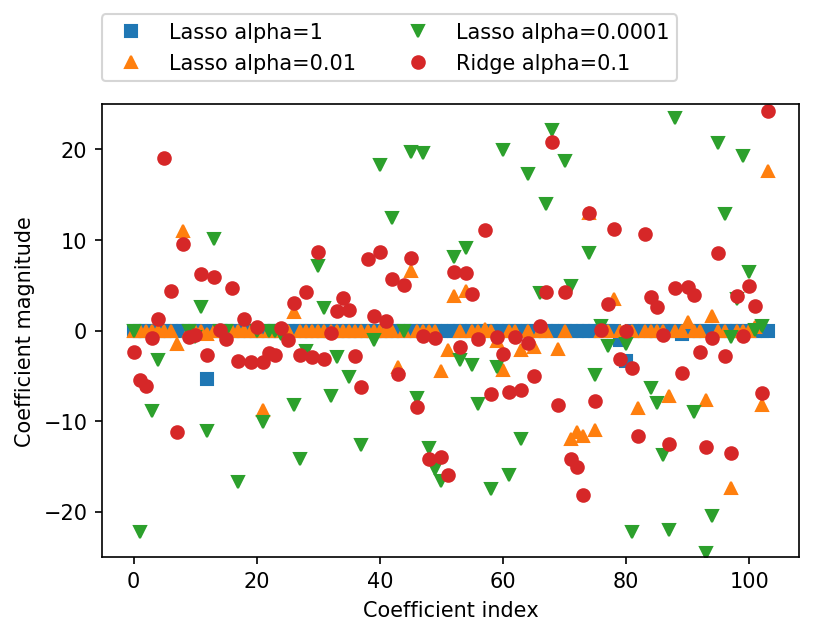

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print()

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
print()

plt.figure(dpi=150)
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

The performance is bad on both training and test data, a clear sign of underfitting, and the model only used 4 of the 105 features.  Trying again this time with tuned parameters we can see we get much better performace in both cases. Then with an even lower alpha we start to see more overfitting closer to a linear regression.

In practice ridge is the first choice between it and lasso, lasso is the better choice when there a lot of features and we think only a few contribute to the outcome.  `scikit-learn` also has the `ElasticNet` class which is a combination of ridge and lasso penalties.  In practive this works best but we have two paramters to tune for the two types of regularization.

##### Linear models for classification

These models are also regularly used for classification.  Predictions come from the following formula:

$$ \hat{y} = w[0] * x[0] + w[1] * x[1] + . . . + w[p] * x[p] + b > 0$$

This is similar to the regression but this time we threshold on zero and if $> 0$ we classify as class +1, and if $<0$  we classify as class -1.  So for a given number of dimensions a binary linear classification is dividing a set by a line, plane, or hyperplane.

Linear classification models are differntiated by:
* how combos of coefficients and intercepts fit the training data
* type of regularization that is used

Two most common are:
* __Logistic regression__ (`linear_model.LogisticRegression` in `scikit-learn`) which is actually a classification despite the name
* __Linear support vector machines__ (aka linear SVMs, `svm.LinearSVC` in `scikit-learn` where SVC stands for support vector classifier)

Applied to the `forge` dataset from earlier:

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


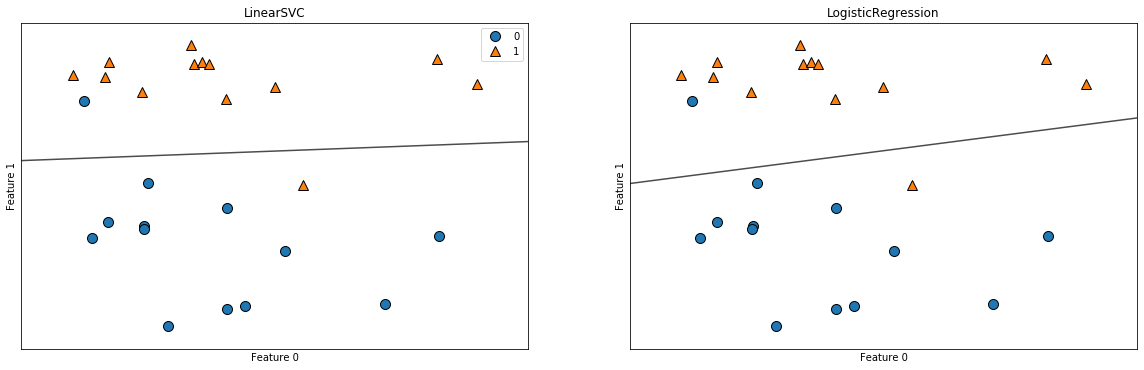

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for model, ax in zip([LinearSVC(), LogisticRegression(solver='liblinear')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

The two methods have similar decision boundary and by default apply L2 regularization.  For both the regularization strength parameter is `C` where higher is _less_ regularization (aka best possible fit to the training data) and lower stresses coefficients close to zero.

Low values of `C`means the algorithm adjusts to the "majority" of data points
High values of `C` stresses that each point is classified correctly

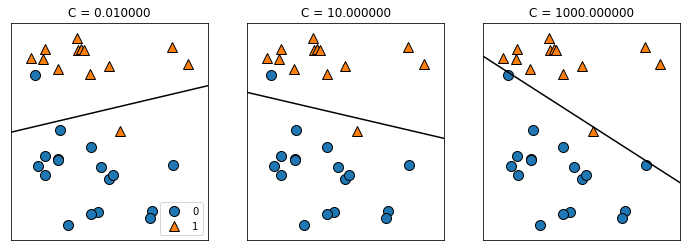

In [39]:
mglearn.plots.plot_linear_svc_regularization()

As we can see going from `C = 0.01` to `C = 10` causes the line to shift toward the misclassified objects.  For `C = 1000` we can see the model is probably overfitting. Now looking at a real dataset:

Training set score: 0.953
Test set score: 0.958

Training set score: 0.972
Test set score: 0.965

Training set score: 0.934
Test set score: 0.930


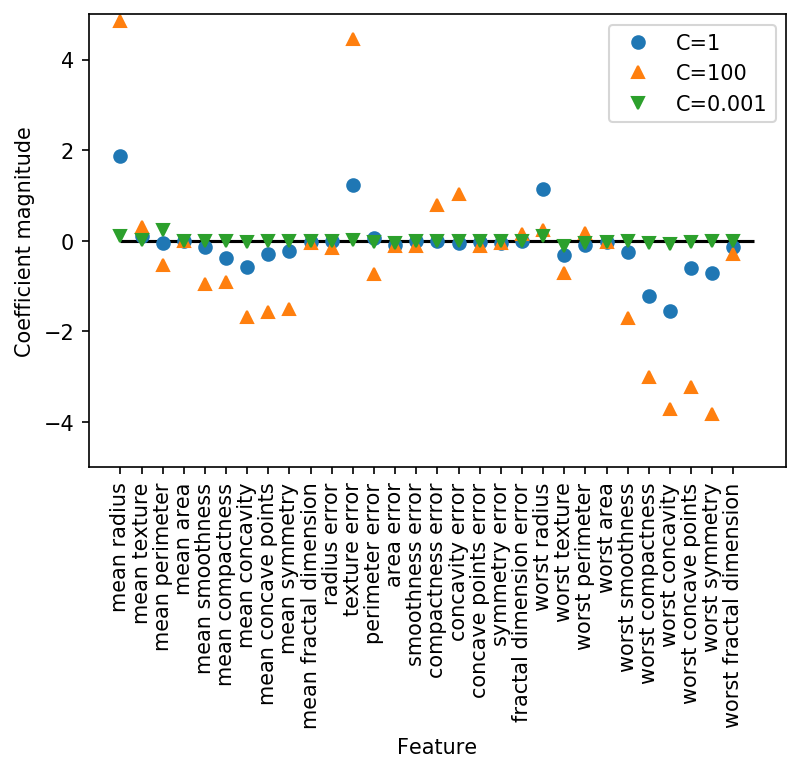

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print()
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
print()
logreg001 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

plt.figure(dpi=150)
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

_**IMPORTANT NOTE FROM BOOK**_: Stronger regularization pushes coefficients more and more toward zero, though coefficients never become exactly zero. Inspecting the plot more closely, we can also see an interesting effect in the third coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient is negative, while for C=0.001, the coefficient is positive, with a magnitude that is even larger than for C=1. Interpreting a model like this, one might think the coefficient tells us which class a feature is associated with. For example, one might think that a high “texture error” feature is related to a sample being “malignant.” However, the change of sign in the coefficient for “mean perimeter” means that depending on which model we look at, a high “mean perimeter” could be taken as being either indicative of “benign” or indicative of “malignant.” This illustrates that interpretations of coefficients of linear models should always be taken with a grain of salt.

For a model that is easier to interpret we might want L1 regularization.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


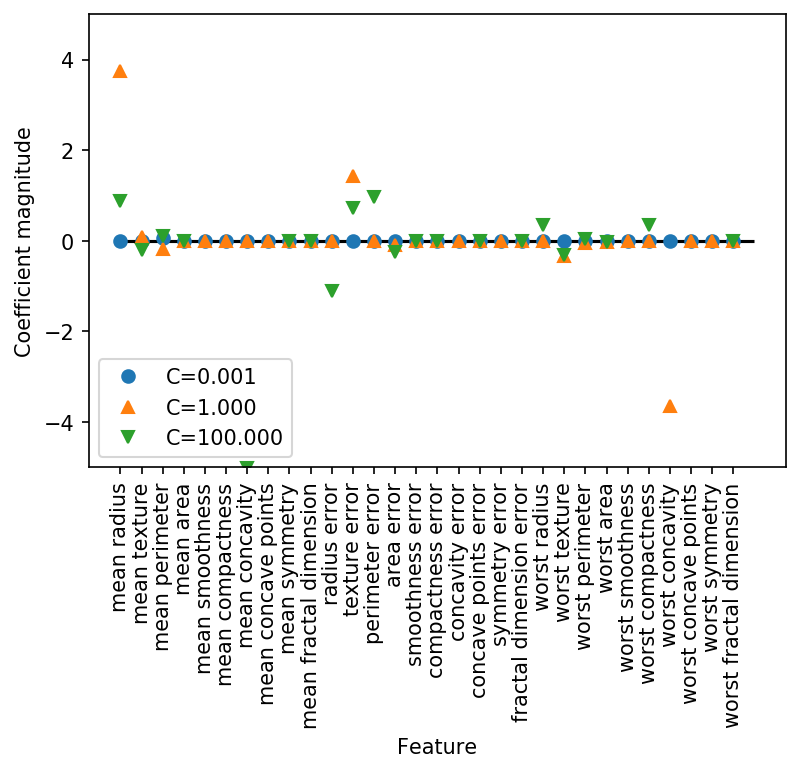

In [41]:
plt.figure(dpi=150)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

As we can see the main difference is in the `penalty` parameter.


_**Linear models for multiclass classification**_

Linear classification for binary problems don't often naturally extend to multiclass ones (except logistic regression).  One method to extend these binary methods is the __one-vs.-rest__ approach.  A binary model is produced for each class trying to separate it from the rest.  All the models are run on a test point and the model with the highest score of the single class "wins".  The equation in question that needs to be highest is

$$w[0] * x[0] + w[1] * x[1] + . . . + w[p] * x[p] + b$$

An example:

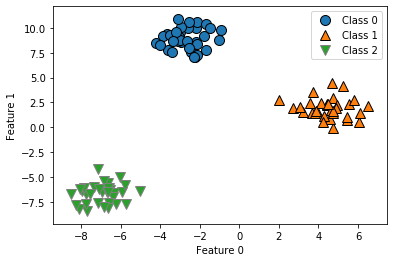

In [42]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


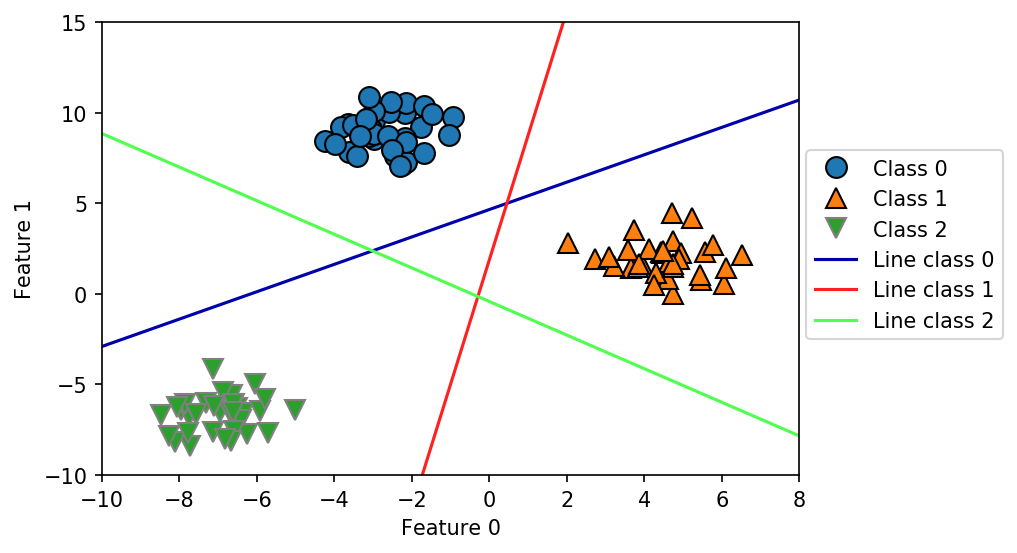

In [43]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

plt.figure(dpi=150)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

We can see the `coef_` has a shape of 3 by 2 meaning for each row there is a coefficient vector for each class with the two coefficients (one for each feature).

Plottedd above are the three lines coming from the binary classifications.  The center triangle is deemed to be the "rest" for all the classifier so anything that falls into it is classified by the line the point falls closest too.  Here that is visualized.

Text(0, 0.5, 'Feature 1')

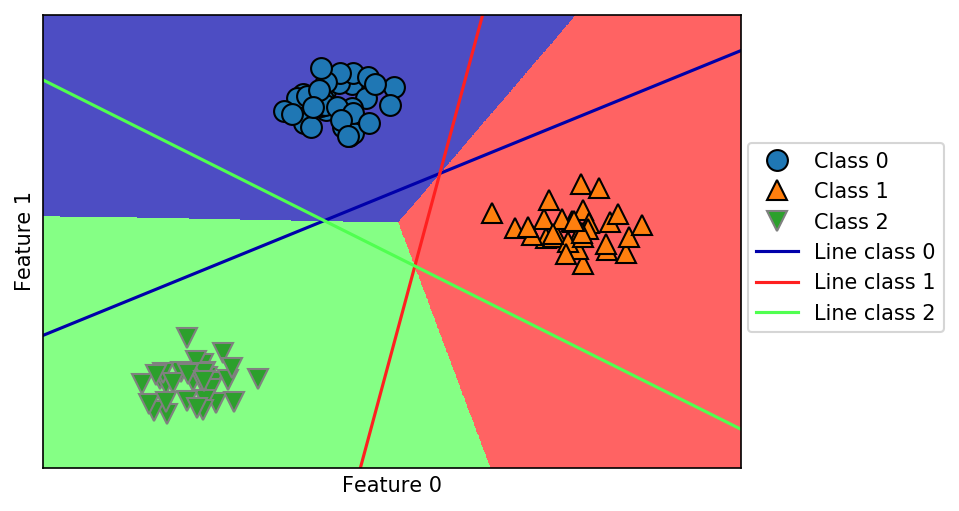

In [44]:
plt.figure(dpi=150)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Strengths, weaknesses, and parameters

Parameters:
* Main parameter is the regularization parameter for linear models.
* `alpha` for regression models
* `C` for `LinearSVC` and `LogisticRegression` (classification methods)
* Large `alpha`s and small `C`s = simpler models
* These params are typically searched for on a logarithmic scale
* Need to choose type of regularization (L1, L2, a combination, or none)
    * L1 - good if you think only a few features contribute
    * L2 is a good default
    
Pros:
* Fast to train and predict
* Scale to large or sparse datasets well
    * If hundred thousands or millions or rows `solver='sag'` is a good option in `LogisticRegression` or `Ridge`
* `SGDClassifier` and `SGDRegressor` also other good options for more scalable linear models
* Usually easy to understand
* Good for when number of features is larger than the number of samples

Cons:
* Not necessarily clear why coefficients are why they are
* Coefficients might be hard to interpret for highly correlated features
* Other models are usually better if the dataset is lower dimensionality


## Method Chaining

`fit` method of `scikit-learn` models return `self` so we can method chain:

```python
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

# fit and predict with the model it in one line
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

# instantiate model, fit it, and then predict in one line
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
```

Usually we want to avoid doing all three in one line because it prevents us from inspecting the trained model since it isn't stored to a variable